In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from astropy.io import fits
import astropy.table as table

from collections import Counter

In [2]:
plt.style.use('../code/std.mplstyle')
import matplotlib as mp
mp.rcParams['text.usetex'] = True

In [3]:
## loads lasted versions from github
dsph_mw = table.Table.read('https://raw.githubusercontent.com/apace7/local_volume_database/main/data/dwarf_mw.csv')
j_factor = table.Table.read('https://raw.githubusercontent.com/apace7/local_volume_database/main/data/j_factor.csv')

In [4]:
## loads versions locally 
dsph_mw = table.Table.read('../data/dwarf_mw.csv')
j_factor = table.Table.read('../data/j_factor.csv')

In [5]:
## select single value and angle for each galaxy
input_j_factor = j_factor[np.logical_and.reduce((j_factor['selection']=='PS19',j_factor['angle']==0.5, j_factor['use']==1,))]
print(len(input_j_factor))

52


In [6]:
comb_input_j_factor = table.join(dsph_mw, input_j_factor, keys='key')
print(len(comb_input_j_factor))

43


In [7]:
comb_input_j_factor2 = comb_input_j_factor[np.logical_and.reduce((comb_input_j_factor['key']!='tucana_3',
                                           comb_input_j_factor['key']!='carina_3',
                                           comb_input_j_factor['key']!='grus_2',
                                           comb_input_j_factor['key']!='segue_2',
                                           comb_input_j_factor['key']!='tucana_5',
                                           comb_input_j_factor['key']!='hydra_2', 
                                           comb_input_j_factor['key']!='triangulum_2',
                                           comb_input_j_factor['key']!='leo_4'))]
comb_input_j_factor3 = np.sort(comb_input_j_factor2, order='logj')

In [8]:
names = [r'${\rm Cra~II}$',r'${\rm Gru~I}$',r'${\rm Psc~II}$',r'${\rm Leo~V}$', r'${\rm Eri~II}$',r'${\rm Her~\;}$ ',r'${\rm CVn~I}$',r'${\rm Leo~V}$',r'${\rm Leo~I}$',r'${\rm Sxt}$',r'${\rm Cen~I}$',r'${\rm Leo~II}$',r'${\rm Aqu~II}$',r'${\rm CVn~II}$',r'${\rm Car}$',r'${\rm Peg~III}$',r'${\rm Peg~IV}$',r'${\rm For}$',r'${\rm Boo~I}$',r'${\rm Car~II}$',r'${\rm UMa~I}$',r'${\rm Boo~II}$',r'${\rm Tuc~IV}$',r'${\rm Scl}$',r'${\rm Hyi~I}$',r'${\rm UMi}$',r'${\rm Eri~IV}$',r'${\rm Dra~I}$',r'${\rm Tuc~II}$',r'${\rm Ret~II}$',r'${\rm Com}$',r'${\rm Seg~1}$',r'${\rm Hor~I}$',r'${\rm UMa~II}$',r'${\rm Wil~1}$',]
print(len(names), len(comb_input_j_factor3))

35 35


In [9]:
# for i in range(len(comb_input_j_factor3)):
#     print(names[i], comb_input_j_factor3['key'][i])

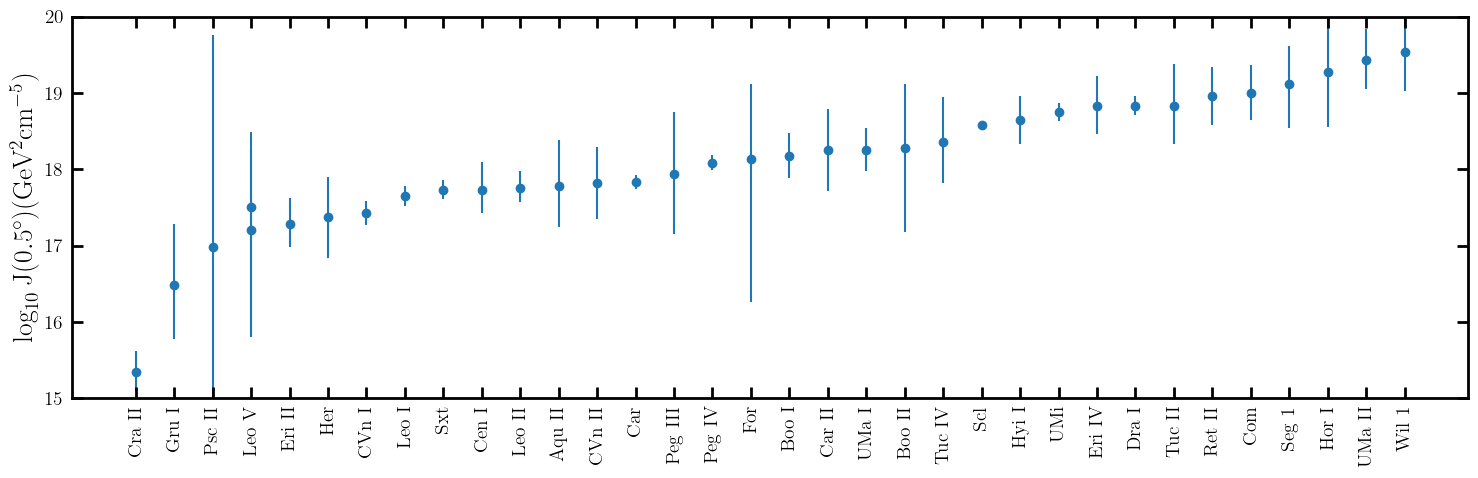

In [10]:
## this figure is similar to figure 11 from https://ui.adsabs.harvard.edu/abs/2023arXiv230808602H/abstract
## this adds Cra 2, this includes most dwarfs with resolved velocity dispersion in/near MW (no Ant 2 or Leo T)

plt.figure(figsize=(15,5))


## there are better ways to do the names

plt.errorbar(names, comb_input_j_factor3['logj'], fmt='o', yerr=[comb_input_j_factor3['logj_em'], comb_input_j_factor3['logj_ep']], zorder=1)

plt.xticks(rotation = 90)

plt.ylim(15,20)
plt.ylabel(r'${\rm \log_{10}{J(0.5^{\circ})}(GeV^2 cm^{-5})}$')
plt.tight_layout()
# plt.savefig('j_factor_summary_1.pdf')
plt.show()

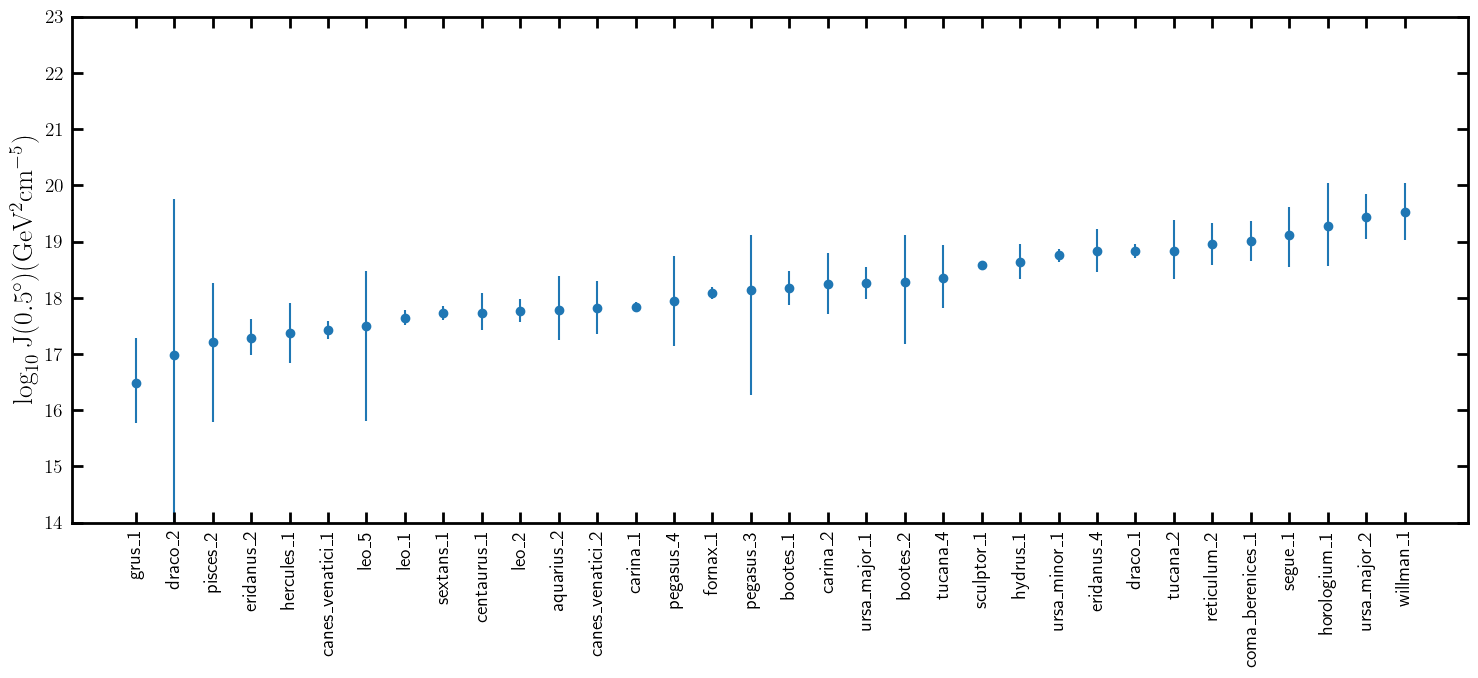

In [11]:
### name column with key
plt.figure(figsize=(15,7))
## remove j-factors that are unresolved (or low)
comb_input_j_factor2 = comb_input_j_factor[np.logical_and.reduce((comb_input_j_factor['key']!='tucana_3',
                                           comb_input_j_factor['key']!='carina_3',
                                           comb_input_j_factor['key']!='grus_2',
                                           comb_input_j_factor['key']!='segue_2',
                                           comb_input_j_factor['key']!='tucana_5',
                                           comb_input_j_factor['key']!='hydra_2', 
                                           comb_input_j_factor['key']!='triangulum_2',
comb_input_j_factor['key']!='leo_4',comb_input_j_factor['key']!='crater_2'))]
comb_input_j_factor3 = np.sort(comb_input_j_factor2, order='logj')

## there are better ways to do the names
plt.errorbar(comb_input_j_factor3['key'], comb_input_j_factor3['logj'], fmt='o', yerr=[comb_input_j_factor3['logj_em'], comb_input_j_factor3['logj_ep']], zorder=1)

plt.xticks(rotation = 90)

plt.ylim(14,23)
plt.ylabel(r'${\rm \log_{10}{J(0.5^{\circ})}(GeV^2 cm^{-5})}$')
plt.tight_layout()
# plt.savefig('j_factor_summary_1.pdf')
plt.show()

8


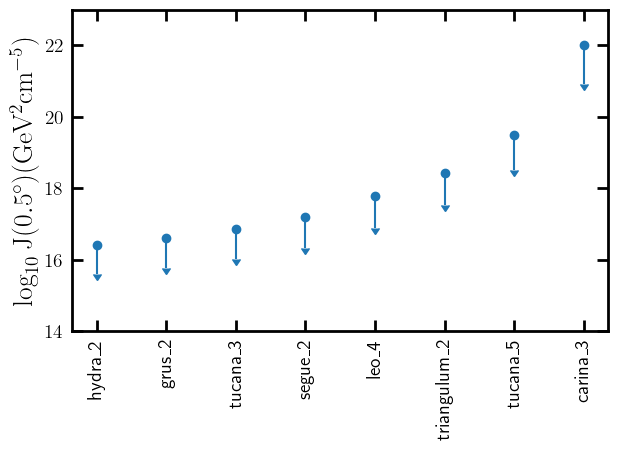

In [12]:
## several systems with upper limits
## name column with key
comb_input_j_factor_ul = comb_input_j_factor[~np.logical_and.reduce((comb_input_j_factor['key']!='tucana_3',
                                           comb_input_j_factor['key']!='carina_3',
                                           comb_input_j_factor['key']!='grus_2',
                                           comb_input_j_factor['key']!='segue_2',
                                           comb_input_j_factor['key']!='tucana_5',
                                           comb_input_j_factor['key']!='hydra_2', 
                                           comb_input_j_factor['key']!='triangulum_2',
comb_input_j_factor['key']!='leo_4'))]
comb_input_j_factor_ul_sort = np.sort(comb_input_j_factor_ul, order='logj_ul95')
print(len(comb_input_j_factor_ul))

plt.errorbar(comb_input_j_factor_ul_sort['key'], comb_input_j_factor_ul_sort['logj_ul95'], fmt='o', yerr=comb_input_j_factor_ul_sort['logj_ul95']*.05, zorder=1, uplims=True)

plt.xticks(rotation = 90)

plt.ylim(14,23)
plt.ylabel(r'${\rm \log_{10}{J(0.5^{\circ})}(GeV^2 cm^{-5})}$')
plt.tight_layout()
# plt.savefig('j_factor_summary_1.pdf')
plt.show()

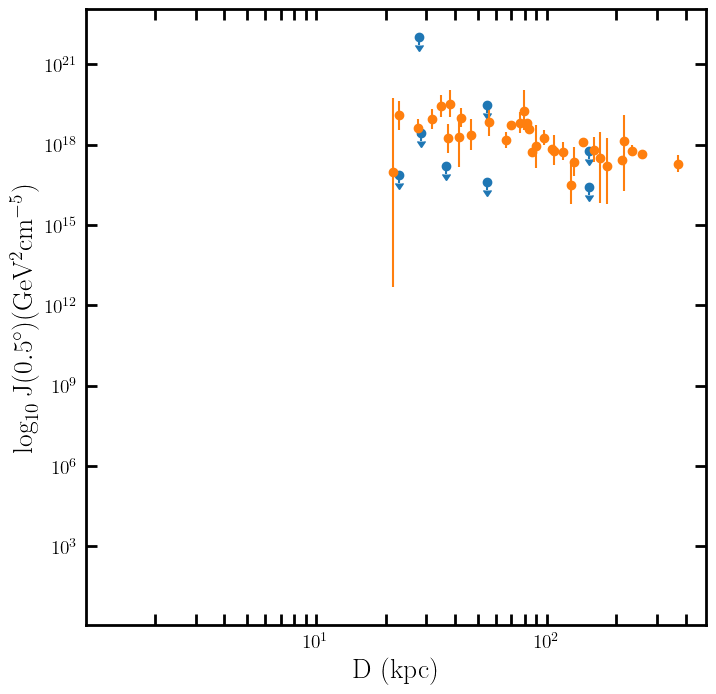

In [13]:
## J-factor vs distance
plt.figure(figsize=(8,8))
plt.errorbar(comb_input_j_factor_ul['distance'], 10**comb_input_j_factor_ul['logj_ul95'], fmt='o', yerr=(10**comb_input_j_factor_ul['logj_ul95'])/2, zorder=1, uplims=True)
plt.yscale('log')
plt.xscale('log')
plt.errorbar(comb_input_j_factor2['distance'], 10**comb_input_j_factor2['logj'], fmt='o', yerr=[10**(comb_input_j_factor2['logj'])-10**(comb_input_j_factor2['logj']-comb_input_j_factor2['logj_em']), 10**(comb_input_j_factor2['logj']+comb_input_j_factor2['logj_ep'])-10**(comb_input_j_factor2['logj'])], zorder=1)

plt.ylabel(r'${\rm \log_{10}{J(0.5^{\circ})}(GeV^2 cm^{-5})}$')
plt.xlabel(r'${\rm D~(kpc})$')
plt.show()

In [14]:
comb_input_j_factor4 = comb_input_j_factor2[np.logical_and.reduce((comb_input_j_factor2['key']!='leo_5', comb_input_j_factor2['key']!='crater_2', comb_input_j_factor2['key']!='tucana_2', comb_input_j_factor2['key']!='grus_1'))]

In [15]:
def j_factor_prediction(sigma, dist, rhalf, jo=17.87):
    ## http://arxiv.org/abs/1802.06811
    ## units: km/s, kpc, pc
    return np.log10(10**jo * (sigma/5.)**4 * (dist/100.)**(-2) * (rhalf/100.)**(-1))

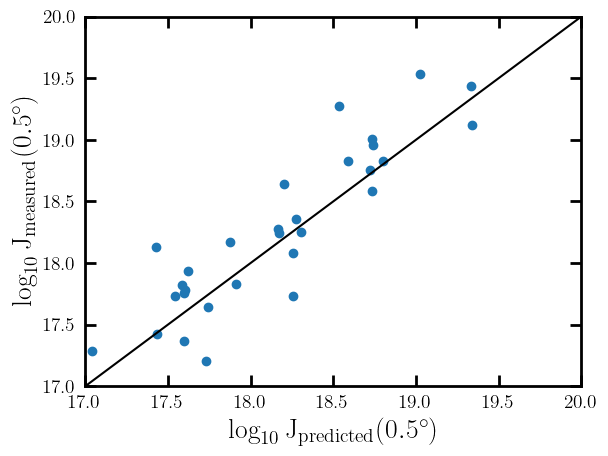

In [16]:
## comparison between observed values and predicted values from https://ui.adsabs.harvard.edu/abs/2019MNRAS.482.3480P/abstract
## note that for many dwarfs the velocity dispersion, rhalf, and/or distance have been updated since the J-factor measurement 
plt.plot( j_factor_prediction(comb_input_j_factor4['vlos_sigma'], comb_input_j_factor4['distance'], comb_input_j_factor4['rhalf_sph_physical']), comb_input_j_factor4['logj'], 'o', zorder=1)
plt.xlim(17, 20)
plt.ylim(17, 20)
plt.plot([17, 20], [17, 20], c='k')
plt.ylabel(r'${\rm \log_{10}{J_{measured}(0.5^{\circ})}}$')
plt.xlabel(r'${\rm \log_{10}{J_{predicted}(0.5^{\circ})}}$')
plt.show()

In [17]:
test = j_factor[~j_factor['selection'].mask]
Counter(test['selection'])

Counter({'PS19': 244, 'GS15': 120, 'B15': 63, 'H16': 27, 'NFW': 18})

In [18]:
input_j_factor_gs = j_factor[np.logical_and.reduce((j_factor['selection']=='GS15',j_factor['angle']==0.5, ))]
print(len(input_j_factor_gs))
input_j_factor = j_factor[np.logical_and.reduce((j_factor['selection']=='PS19',j_factor['angle']==0.5, j_factor['use']==1,))]

20


In [19]:
comb = table.join(input_j_factor_gs, input_j_factor, keys='key', table_names=['GS15', 'PS19'])
len(comb)

20

comparison of J-factors from 

Pace & Strigari 2019 https://ui.adsabs.harvard.edu/abs/2019MNRAS.482.3480P/abstract

Geringer-Sameth et al 2015 https://ui.adsabs.harvard.edu/abs/2015ApJ...801...74G/abstract

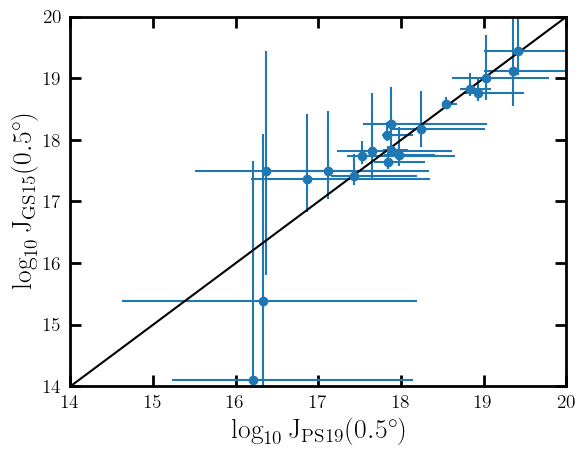

In [20]:
## the dwarfs with large differences are due to prior choices and some data samples having resolved/unresolved differences in different spectroscopic samples
plt.errorbar(comb['logj_GS15'], comb['logj_PS19'], fmt='o', yerr=[comb['logj_em_PS19'], comb['logj_ep95_PS19']], xerr=[comb['logj_em_GS15'], comb['logj_ep95_GS15']])
plt.xlim(14, 20)
plt.ylim(14, 20)
plt.plot([14, 20], [14, 20], c='k')
plt.ylabel(r'${\rm \log_{10}{J_{GS15}(0.5^{\circ})}}$')
plt.xlabel(r'${\rm \log_{10}{J_{PS19}(0.5^{\circ})}}$')
plt.show()